In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [2]:
data_path = "https://www.statlearning.com/s/Advertising.csv"
data_df = pd.read_csv(data_path,index_col=0)
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
X = data_df[['TV','radio','newspaper']].values

X = np.concatenate([np.ones((X.shape[0],1)),X], axis=1)
y=data_df['sales'].values.reshape(-1,1)

n=X.shape[0]
d=X.shape[1]

print('no. of samples(n): ',n)
print('no. of features(d): ',d)

no. of samples(n):  200
no. of features(d):  4


In [4]:
#feature scaling
data_df.iloc[:,:3].describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [6]:
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

print("Mean of TV: {:.2f}".format(X[:,1].mean()))
print("Mean of radio: {:.2f}". format(X[:,2].mean()))
print("Mean of newspaper: {:.2f}". format(X[:,3].mean()))

print("Std of TV: {:.2f}". format(X[:,1].std()))
print("Std of radio: {:.2f}". format(X[:,2].std()))
print("Std of newspaper: {:.2f}". format(X[:,3].std()))


pd.DataFrame(X, columns=['_', 'TV', 'radio', 'newspaper'])

Mean of TV: -0.00
Mean of radio: -0.00
Mean of newspaper: -0.00
Std of TV: 1.00
Std of radio: 1.00
Std of newspaper: 1.00


,_,TV,radio,newspaper
0,1.0,0.969852,0.981522,1.778945
1,1.0,-1.197376,1.082808,0.669579
2,1.0,-1.516155,1.528463,1.783549
3,1.0,0.052050,1.217855,1.286405
4,1.0,0.394182,-0.841614,1.281802
...,...,...,...,...
195,1.0,-1.270941,-1.321031,-0.771217
196,1.0,-0.617035,-1.240003,-1.033598
197,1.0,0.349810,-0.942899,-1.111852
198,1.0,1.594565,1.265121,1.640850


In [7]:
#gradient descent

In [9]:
#random initialization 
def initialize_betas(X,y):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas

betas = initialize_betas(X,y)
print(betas)

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


In [10]:
#cost function
def calculate_cost(betas):
    cost = 1/2 * np.sum(np.square(np.dot(X,betas)-y))
    return cost

print("Cost with random betas:", calculate_cost(betas))

Cost with random betas: 17073.932296410057


In [11]:
#gradients
def calculate_gradients(betas):
    gradients= np.dot(X.T, (np.dot(X,betas)-y))
    return gradients

print("Gradients for random betas = \n", calculate_gradients(betas))

Gradients for random betas = 
 [[-2451.68953081]
 [ -698.05275055]
 [ -240.94240852]
 [  284.39547481]]


In [12]:
def gradient_descent(X, y, alpha=0.003 , max_iters=10000, precision = 1e-3):
  iteration = 0 
  difference = 1
  betas = initialize_betas(X,y) 
  cost = calculate_cost(betas) 
  costs = [calculate_cost(betas)] 

  while difference > precision and iteration <= max_iters :
    betas = betas - alpha * calculate_gradients(betas)

    cost = calculate_cost(betas)

    difference = np.abs(costs[iteration] - cost) 
    costs.append(cost)
    
    print("iteration: {}, cost: {}".format(iteration, cost))
    iteration += 1
    
    if(cost == np.infty):
      print("Cost reached infinity, try smaller learning rate")
      break
    
  return betas, iteration, costs

In [13]:
beta , steps, costs = gradient_descent(X,y)

iteration: 0, cost: 3088.921208468101
iteration: 1, cost: 773.3549524960533
iteration: 2, cost: 374.2742681812921
iteration: 3, cost: 299.9477443662568
iteration: 4, cost: 284.17332625174714
iteration: 5, cost: 280.2011413337413
iteration: 6, cost: 279.02366882299606
iteration: 7, cost: 278.63221698846144
iteration: 8, cost: 278.4934536147585
iteration: 9, cost: 278.44270007295745
iteration: 10, cost: 278.4238705633019
iteration: 11, cost: 278.4168409525166
iteration: 12, cost: 278.41420945540756
iteration: 13, cost: 278.41322321503844


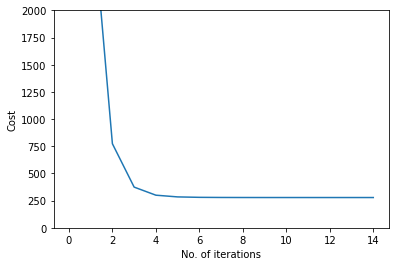

In [14]:
plt.plot(costs)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.ylim(0, 2000)
plt.show()